In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as lm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import pylab 
import scipy.stats as stats
import sympy 

# Regresión Lineal Ordinaria (LSS)

## a) Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó. Explique por qué se realiza la línea 2.

In [717]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True) #Eliminacion de Datos Inecesarios
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### Respuesta
Los parametros id, date y zipcode no son necesario para el analisis futuro.

## (b) Describa brevemente el dataset a utilizar. 

In [718]:
#Volver analizar esto y mejorar el .describe, ver api
df.shape 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### Respuesta

1) Data set compuesto por 21613 rows & 18 columns.
<br>2) Compuesto por 5 variables float y 13 int.
    

## (c) Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.

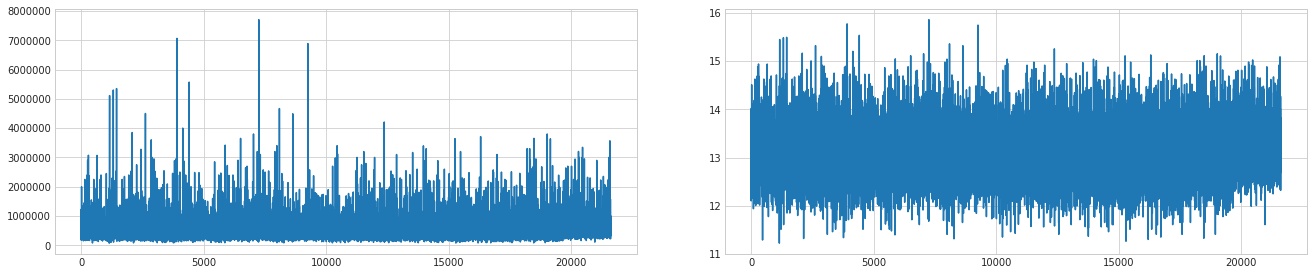

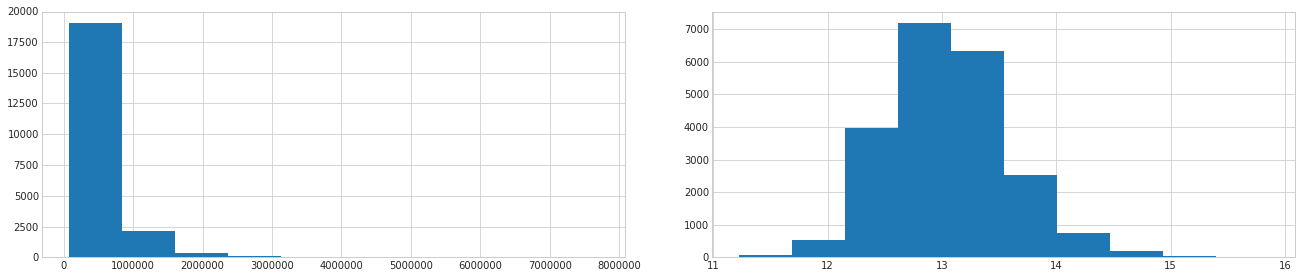

In [719]:
scaler = StandardScaler()  #Estandarizacion de datos (Media 0, D.Estandar 1)
plt.subplot(221)
plt.plot(df['price'])
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) #Normalizacion de los datos de DF
df_scaled['price'] = np.log(df['price']) #linealizacion de la variable price


plt.subplot(222)
plt.plot(np.log(df['price']))
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=3, hspace=0.25,wspace=0.15)
plt.show()
plt.subplot(221)
plt.hist(df['price'])
plt.subplot(222)
plt.hist(np.log(df['price']))
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=3, hspace=0.25,wspace=0.15)
plt.show()

### Respuesta

StandarScaler() hace que el promedio de todos los datos sea 0 y que su varianza sea unitaria de tal forma que se cumplan los supuestos necesarios para el uso de las técnicas aplicadas en regresión lineal.
Numpy.log aplica logaritmo natural a los precios. 

## (d) Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 3 y los argumentos que se deben entregar a la función que implementa la regresión lineal.

In [720]:
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version (basicamente elimina el primer parametro "price")
N = X.shape[0]           #Asigna la cantidad de datos en las 17 variables restantes
X.insert(X.shape[1], 'intercept', np.ones(N)) #Asigna el intercepto en 1 a cada valor en la tabla
y = df_scaled['price']                        #Para asi generar la convencion y eliminar B0 y dejar la regresion de forme
#mascara estatica con el 70% de los datos     # Sum(Xgorro*Bj) (Vector Form)
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1 
istrain = mascara== 1                         #Pasos para entrenar los datos
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
bGorro = linreg.coef_

## (e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [721]:
Covariance_Matrix = np.dot(Xtrain.T,Xtrain)
Covariance_Matrix_inventida = np.linalg.inv(Covariance_Matrix)
yGorro = linreg.predict(Xtrain)
ecm = mean_squared_error(ytrain, yGorro)
var_bGorro = ecm*Covariance_Matrix_inventida
X_Columns = list(X.columns)
values = {}
zscore = (bGorro/np.sqrt(var_bGorro.diagonal()))
d = {'pesos': pd.Series(bGorro,index = X_Columns),
     'z-score' : pd.Series(zscore, index = X_Columns)}
final_table = pd.DataFrame(d)
#Las variables mas correlacionadas con la respuesta son en orden decreciente son:
print(final_table.sort_values(by=['z-score'], ascending=[False]))
#Con el 5% de significancia se tiene que los datos con z-score mayor a 1.96 representan los datos mas importantes del
#Conjunto ya que el resto de los datos cae en el 95% restante de la grafica normal, por lo cual, estos datos pudieron
#ser significativos unicamente por el azar
for i in range(18):
    if(abs(final_table['z-score'][i])>1.96):
        print(final_table.index[i])
final_table.head(18)

                   pesos      z-score
intercept      13.039692  6224.325416
lat             0.186277    85.849012
grade           0.186212    48.098398
sqft_living15   0.085933    23.583466
condition       0.045277    20.549723
view            0.042082    17.401632
waterfront      0.033526    14.794985
bathrooms       0.055960    14.665238
floors          0.037595    12.277599
sqft_lot        0.022159     7.602265
yr_renovated    0.014798     6.894117
long           -0.004079    -1.590882
sqft_lot15     -0.007013    -2.348255
bedrooms       -0.008270    -3.035987
yr_built       -0.109875   -33.811790
sqft_living     0.057769          NaN
sqft_above      0.047130          NaN
sqft_basement   0.031699          NaN
bedrooms
bathrooms
sqft_lot
floors
waterfront
view
condition
grade
yr_built
yr_renovated
lat
sqft_living15
sqft_lot15
intercept


,pesos,z-score
bedrooms,-0.008270,-3.035987
bathrooms,0.055960,14.665238
sqft_living,0.057769,NaN
sqft_lot,0.022159,7.602265
floors,0.037595,12.277599
waterfront,0.033526,14.794985
view,0.042082,17.401632
condition,0.045277,20.549723
grade,0.186212,48.098398
sqft_above,0.047130,NaN


(f) Proponga un método para corregir lo observado (Hint: insp´ırese en los m´etodos de feature engineering
de las siguiente secciones). Verif´ıquelo mediante los Z-score presentados en la pregunta e).

R: eliminamos del data set sqft_living ya que es linearmente dependiente de sqft_above, ademas podemos usar RobustScaler() para tratar mejor los outliers pero los datos que no tienen outliers se veran afectados de manera negativa

In [722]:
#Como el Dataframe esta lleno de outliers, se requiere usar una escala robusta RobustScaler como pre-proceso de los datos
#Para que el rango de estandarizacion considere estos outliers en la regresion lineal, por lo cual el codigo cambia a:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode','sqft_living'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios
scaler = StandardScaler()
#scaler = RobustScaler() #Estandarizacion de datos Robusta, remueve la media y escala los datos considerando los outliers
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price']) 


Luego el codigo sigue tal cual, generando las bGorro de la regresion lineal y sacando el z-score

In [723]:
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version (basicamente elimina el primer parametro "price")
N = X.shape[0]           #Asigna la cantidad de datos en las 17 variables restantes
X.insert(X.shape[1], 'intercept', np.ones(N)) #Asigna el intercepto en 1 a cada valor en la tabla
y = df_scaled['price']                        #Para asi generar la convencion y eliminar B0 y dejar la regresion de forme
#mascara estatica con el 70% de los datos     # Sum(Xgorro*Bj) (Vector Form)
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1 
istrain = mascara== 1                         #Pasos para entrenar los datos
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
bGorro = linreg.coef_
Covariance_Matrix = np.dot(Xtrain.T,Xtrain)
Covariance_Matrix_inventida = np.linalg.inv(Covariance_Matrix)
yGorro = linreg.predict(Xtrain)
ecm = mean_squared_error(ytrain, yGorro)
var_bGorro = ecm*Covariance_Matrix_inventida
X_Columns = list(X.columns)
values = {}
zscore = (bGorro/np.sqrt(var_bGorro.diagonal()))
d = {'pesos': pd.Series(bGorro,index = X_Columns),
     'z-score' : pd.Series(zscore, index = X_Columns)}
final_table = pd.DataFrame(d)
#Las variables mas correlacionadas con la respuesta son en orden decreciente son:
print(final_table.sort_values(by=['z-score'], ascending=[False]))
#Con el 5% de significancia se tiene que los datos con z-score mayor a 1.96 representan los datos mas importantes del
#Conjunto ya que el resto de los datos cae en el 95% restante de la grafica normal, por lo cual, estos datos pudieron
#ser significativos unicamente por el azar
for i in range(17):
    if(abs(final_table['z-score'][i])>1.96):
        print(final_table.index[i])
final_table.head(17)

                   pesos      z-score
intercept      13.039692  6224.325416
lat             0.186277    85.849012
grade           0.186212    48.098398
sqft_living15   0.085933    23.583466
sqft_above      0.099216    21.098521
sqft_basement   0.059536    20.679680
condition       0.045277    20.549723
view            0.042082    17.401632
waterfront      0.033526    14.794985
bathrooms       0.055960    14.665238
floors          0.037595    12.277599
sqft_lot        0.022159     7.602265
yr_renovated    0.014798     6.894117
long           -0.004079    -1.590882
sqft_lot15     -0.007013    -2.348255
bedrooms       -0.008270    -3.035987
yr_built       -0.109875   -33.811790
bedrooms
bathrooms
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
lat
sqft_living15
sqft_lot15
intercept


,pesos,z-score
bedrooms,-0.008270,-3.035987
bathrooms,0.055960,14.665238
sqft_lot,0.022159,7.602265
floors,0.037595,12.277599
waterfront,0.033526,14.794985
view,0.042082,17.401632
condition,0.045277,20.549723
grade,0.186212,48.098398
sqft_above,0.099216,21.098521
sqft_basement,0.059536,20.679680


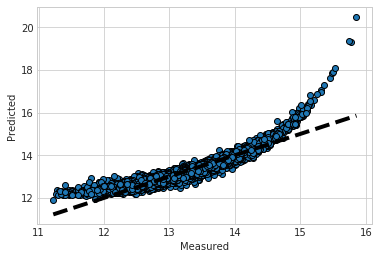

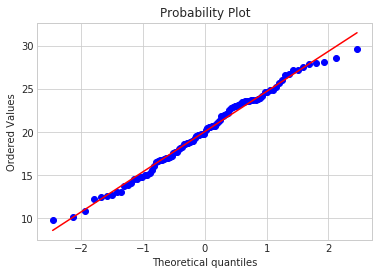

In [724]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)  ##Genera la regresion linean sin consderar el intercepto (ya centrado)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10

predicted = cross_val_predict(linreg, df, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()